# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

 - lazurne
City Number - 102 | City Name - lavrentiya
City Number - 103 | City Name - saint george
City Number - 104 | City Name - narsaq
City Number - 105 | City Name - saint andrews
City Number - 106 | City Name - simoes
City Number - 107 | City Name - male
City Number - 108 | City Name - digapahandi
City Number - 109 | City Name - cururupu
City Number - 110 | City Name - butaritari
City Number - 111 | City Name - san rafael
City Number - 112 | City Name - siavonga
City Not Found
City Number - 113 | City Name - port hardy
City Number - 114 | City Name - severo-kurilsk
City Number - 115 | City Name - sobolevo
City Number - 116 | City Name - miri
City Number - 117 | City Name - champasak
City Number - 118 | City Name - vaini
City Number - 119 | City Name - bilibino
City Not Found
City Number - 120 | City Name - troitskoye
City Number - 121 | City Name - tremedal
City Number - 122 | City Name - maputo
City Not Found
City Number - 123 | City Name - ushtobe
City Number - 124 | City Name -

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': pd.to_datetime(date, unit="s")
    })
city_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,51.01,65,{'all': 66},1.23,AU,2021-02-09 18:17:30
1,Mataura,-46.1927,168.8643,47.08,96,{'all': 98},4.83,NZ,2021-02-09 18:18:11
2,Ushuaia,-54.8000,-68.3000,64.40,55,{'all': 20},4.61,AR,2021-02-09 18:17:12
3,Punta Arenas,-53.1500,-70.9167,68.00,52,{'all': 0},6.91,CL,2021-02-09 18:17:18
4,Rikitea,-23.1203,-134.9692,78.24,71,{'all': 51},6.82,PF,2021-02-09 18:17:33
...,...,...,...,...,...,...,...,...,...
566,Khandyga,62.6667,135.6000,-19.41,86,{'all': 98},2.13,RU,2021-02-09 18:26:47
567,Kazlų Rūda,54.7667,23.5000,15.80,79,{'all': 90},6.91,LT,2021-02-09 18:26:47
568,Salto,-31.3833,-57.9667,81.00,57,{'all': 75},11.50,UY,2021-02-09 18:26:47
569,Caçu,-18.5567,-51.1308,85.44,42,{'all': 27},4.90,BR,2021-02-09 18:26:48


In [47]:
city_df.to_csv('Cities Compiled.csv')

In [48]:
# Inspect the data and remove the cities where the humidity > 100%.
humidity_over100 = city_df['Humidity'] > 100
humidity_over100.value_counts()
# No Cities over 100% Humidity - All Columns Returned False

False    571
Name: Humidity, dtype: int64

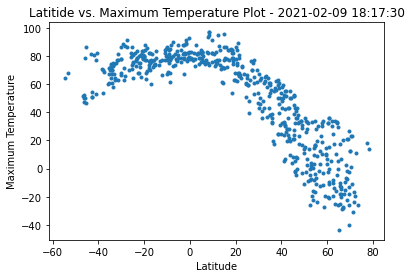

In [50]:
# Latitude vs. Temperature Plot
x_lat = city_df['Latitude']
y_temp = city_df['Maximum Temperature']
plt.scatter(x_lat, y_temp, marker='.')
plt.title(f"Latitide vs. Maximum Temperature Plot - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

## Latitude vs. Humidity Plot

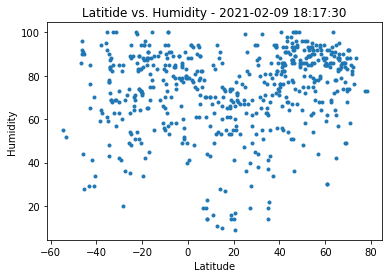

In [52]:
x_lat = city_df['Latitude']
y_hum = city_df['Humidity']
plt.scatter(x_lat, y_hum, marker='.')
plt.title(f"Latitide vs. Humidity - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

## Latitude vs. Cloudiness Plot

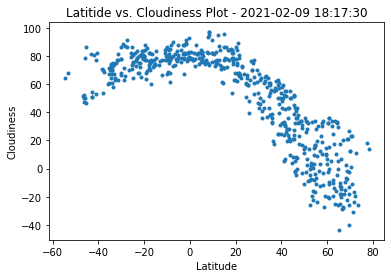

In [53]:
x_lat = city_df['Latitude']
y_cloud = city_df['Cloudiness']
plt.scatter(x_lat, y_temp, marker='.')
plt.title(f"Latitide vs. Cloudiness Plot - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

## Latitude vs. Wind Speed Plot

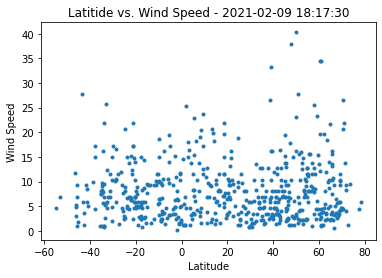

In [54]:
x_lat = city_df['Latitude']
y_wind = city_df['Wind Speed']
plt.scatter(x_lat, y_wind, marker='.')
plt.title(f"Latitide vs. Wind Speed - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [35]:
# OPTIONAL: Create a function to create Linear Regression plots

In [41]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0]
n_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arman',59.70,150.17,66.13,59,{'all': 98},7.47,RU,1594704243
4,Esim,4.87,-2.24,75.00,84,{'all': 63},10.27,GH,1594704244
5,Upernavik,72.79,-56.15,39.88,89,{'all': 100},21.52,GL,1594704244
8,Butaritari,3.07,172.79,81.03,78,{'all': 97},12.19,KI,1594704244
10,Cabo San Lucas,22.89,-109.91,86.00,54,{'all': 25},4.00,MX,1594704151


In [43]:
s_hemi_df = city_df[city_df['Latitude'] <= 0]
s_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ushuaia,-54.80,-68.30,32.00,91,{'all': 40},5.82,AR,1594704133
2,Cape Town,-33.93,18.42,52.00,61,{'all': 40},4.70,ZA,1594704226
3,Rikitea,-23.12,-134.97,72.91,84,{'all': 100},15.84,PF,1594704185
6,Port Alfred,-33.59,26.89,54.09,52,{'all': 35},31.72,ZA,1594704244
7,Saint-Philippe,-21.36,55.77,77.00,53,{'all': 66},3.36,RE,1594704006


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

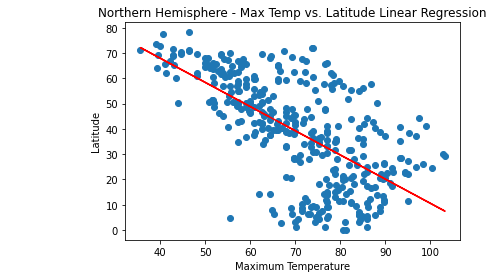

In [63]:
x_max_temp = np.array(n_hemi_df['Maximum Temperature'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_max_temp, y_lat)
regress_values = x_max_temp * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_max_temp,y_lat)
plt.plot(x_max_temp,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('NorthernMaxTempLatitudeLinearRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

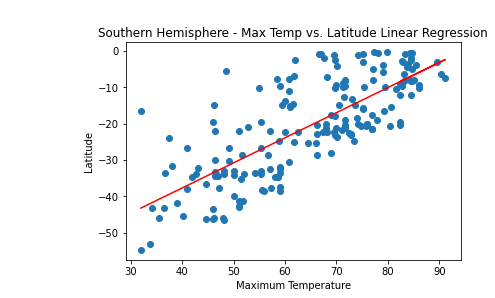

In [64]:
x_max_temp = np.array(s_hemi_df['Maximum Temperature'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_max_temp, y_lat)
regress_values = x_max_temp * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_max_temp,y_lat)
plt.plot(x_max_temp,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('SouthernMaxTempLatitudeLinearRegression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

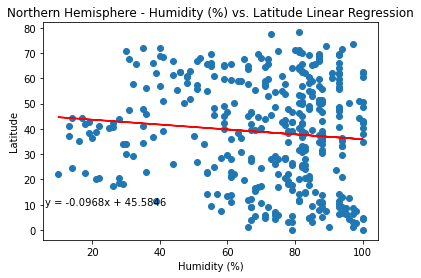

In [71]:
x_hum = np.array(n_hemi_df['Humidity'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum, y_lat)
regress_values = x_hum * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_hum,y_lat)
plt.plot(x_hum,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.savefig('NorthernHumidityLatitudeLinearRegression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

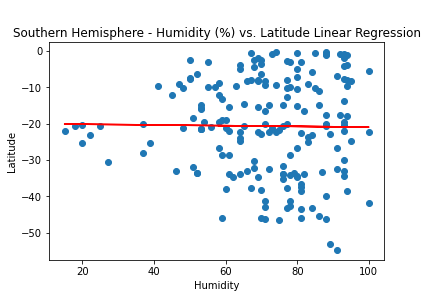

In [83]:
x_ = np.array(s_hemi_df['Humidity'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum, y_lat)
regress_values = x_hum * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_hum,y_lat)
plt.plot(x_hum,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('SouthernHumidityLatitudeLinearRegression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

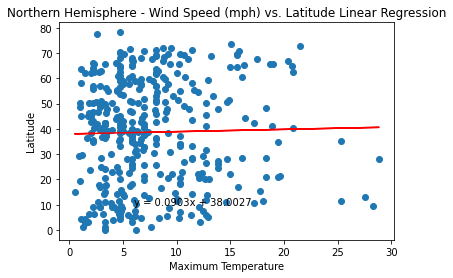

In [84]:
x_wind = np.array(n_hemi_df['Wind Speed'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind, y_lat)
regress_values = x_wind * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_wind,y_lat)
plt.plot(x_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('NorthernWindSpeedLatitudeLinearRegression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

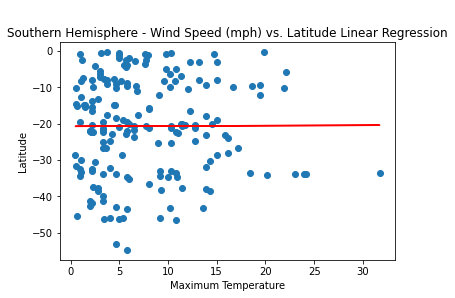

In [86]:
x_wind = np.array(s_hemi_df['Wind Speed'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind, y_lat)
regress_values = x_wind * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_wind,y_lat)
plt.plot(x_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('SouthernWindSpeedLatitudeLinearRegression.png')